**Name: Ketan Jain || Reg. No.: 22MCA0417**

**Machine Learning- Digital Assignment: 1**

***Q1 Design Multiple Linear Regressions (MLR) for estimate the Mileage per gallon (MPG) using Auto-MPG dataset***

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

df=pd.read_csv("auto-mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
finalDF=df.drop('car name',axis=1)
finalDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [6]:

finalDF.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
a=finalDF.horsepower[df.horsepower=="?"].index
a

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [8]:
finalDF.drop(a,axis=0,inplace=True)

In [9]:
finalDF.horsepower[df.horsepower=="?"].index


Int64Index([], dtype='int64')

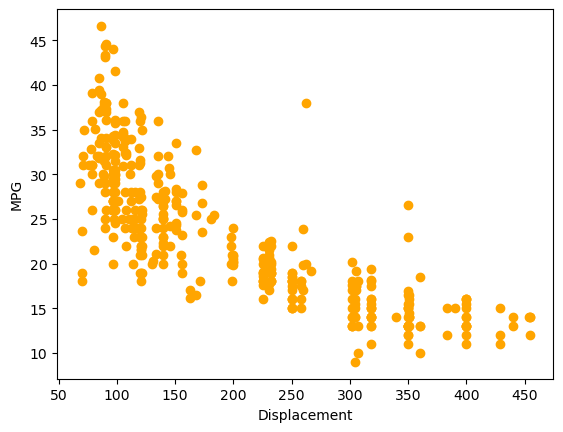

In [10]:
import matplotlib.pyplot as plt

plt.scatter(finalDF.displacement, finalDF.mpg,  color='orange')
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

x=finalDF.drop(["mpg"],axis=1)
y=finalDF.mpg
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [12]:
from sklearn import linear_model


regMod = linear_model.LinearRegression()
XTrain = np.asanyarray(finalDF[['cylinders', 'displacement','horsepower','weight','acceleration','model year','origin']])
YTrain = np.asanyarray(finalDF[['mpg']])
regMod.fit (XTrain, YTrain)
# The coefficients
print ('Coefficients: ', regMod.coef_)
print ('Intercept: ',regMod.intercept_)

Coefficients:  [[-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
   1.4261405 ]]
Intercept:  [-17.21843462]


In [13]:
from sklearn.metrics import r2_score

XTest =np.asanyarray(finalDF[['cylinders', 'displacement','horsepower','weight','acceleration','model year','origin']])
YTest = np.asanyarray(finalDF[['mpg']])
YTest_ = regMod.predict(XTest)

print("Train Accuracy: ",regMod.score(x_train,y_train))
print("Test Accuracy: ", regMod.score(x_test, y_test))

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(YTest_ - YTest)))
print("Residual Sum of Squared (MSE): %.2f" % np.mean((YTest_ - YTest) ** 2))
print("R2: %.2f" % r2_score(YTest_ , YTest) )

Train Accuracy:  0.8222851397735109
Test Accuracy:  0.8192464975848874
Mean Absolute Error: 2.50
Residual Sum of Squared (MSE): 10.85
R2: 0.78


c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
